# GAN - CelebA dataset

## Warning:
Sieƒá na runtime v2-8 TPU zajmuje oko≈Ço 60GB ram i oko≈Ço 20GB dysku

## 1. Tytu≈Ç:</br>Tworzenie realistycznych twarzy z wykorzystaniem sieci generatywnej

## 2. Autorzy

Aleksandra Stanis≈Çawska</br>
Micha≈Ç ≈ªyrek

## 3. Informacje o przedmiocie, danych i zakresie projektu
Celem projektu by≈Ço stworzenie i przetestowanie sieci GAN (Generative Adversarial Network) zdolnej do generowania obraz√≥w na podstawie przestrzeni latentnej. Model mo≈ºe zostaƒá wykorzystany do tworzenia na przyk≈Çad obraz√≥w twarzy, kt√≥re nie nale≈ºƒÖ do rzeczywistych os√≥b, co mo≈ºe byƒá przydatne w przypadku tworzenia gier komputerowych, animacji bƒÖd≈∫ film√≥w.

Dane u≈ºyte w projekcie pochodzƒÖ z zestawu CelebA (CelebFaces Attributes Dataset), kt√≥ry jest popularnym zbiorem danych do zada≈Ñ zwiƒÖzanych z generowaniem i klasyfikacjƒÖ obraz√≥w twarzy. Zestaw CelebA sk≈Çada siƒô z ponad 200 tysiƒôcy obraz√≥w twarzy celebryt√≥w, ka≈ºdy obraz posiada dodatkowe adnotacje, takie jak atrybuty twarzy (np. okulary, broda, w≈Çosy).
Do projektu wykorzystano podzbi√≥r obraz√≥w CelebA, kt√≥ry zosta≈Ç przetworzony do rozdzielczo≈õci 64√ó64. Dane zosta≈Çy normalizowane do zakresu warto≈õci [‚àí1,1], co by≈Ço niezbƒôdne do stabilnego treningu sieci GAN.


In [ ]:
#Konieczne by≈Ço zainstalowanie ni≈ºszej wersji Tensorflow, gdy≈º wersja domy≈õlna 2.17.1 powodowa≈Ça b≈Çƒôdy podczas wywo≈Çywania kodu
!pip uninstall tensorflow -y
!pip install tensorflow==2.13.0

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 524.2/524.2 MB 1.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.7/1.7 MB 56.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.3/17.3 MB 89.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.6/5.6 MB 89.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 440.8/440.8 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Dropout, Conv2DTranspose, Conv2D
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

## 4. Import danych

W celu wczytania i przygotowania danych u≈ºyto funkcji load_celeba_data</br></br>
≈öcie≈ºka do danych: </br>Dane znajdujƒÖ siƒô w folderze img_align_celeba. Folder ten zawiera obrazy w formacie .jpg </br></br>
Zmiana rozmiaru obraz√≥w: </br>Wszystkie obrazy sƒÖ skalowane do rozdzielczo≈õci 64√ó64√ó3, aby by≈Çy zgodne z architekturƒÖ modelu GAN. </br></br>
Normalizacja danych: </br>Piksele obraz√≥w zosta≈Çy przeskalowane do zakresu
[0,1] (podzielone przez 255), a nastƒôpnie przekszta≈Çcone do zakresu
[‚àí1,1] podczas treningu modelu. Normalizacja jest kluczowa dla stabilno≈õci uczenia GAN. </br></br>
Wczytanie danych: </br>U≈ºyto funkcji os.listdir, aby iterowaƒá po plikach w katalogu, i biblioteki PIL do odczytu oraz przekszta≈Çcenia obraz√≥w.

## 5. Opis zbioru danych

Liczba obraz√≥w: </br>Zbi√≥r zawiera 202,599 kolorowych obraz√≥w celebryt√≥w.</br></br>
Format: </br>Obrazy sƒÖ zapisane w formacie .jpg. Ka≈ºdy obraz ma poczƒÖtkowƒÖ rozdzielczo≈õƒá 178√ó218 pikseli.</br></br>
Atrybuty: </br>Ka≈ºdy obraz jest opisany za pomocƒÖ 40 atrybut√≥w binarnych, takich jak:</br>
p≈Çeƒá,</br>
obecno≈õƒá okular√≥w przeciws≈Çonecznych,</br>
broda, </br>wƒÖsy, </br>u≈õmiech,</br>
kolor w≈Ços√≥w</br>d≈Çugo≈õƒá w≈Ços√≥w.</br></br>
Przetwarzanie danych w projekcie:</br>
Wszystkie obrazy zosta≈Çy przeskalowane do rozdzielczo≈õci
64√ó64√ó3 na potrzeby treningu sieci GAN.
Dane zosta≈Çy znormalizowane do zakresu
[‚àí1,1], aby zwiƒôkszyƒá stabilno≈õƒá uczenia.

##6. Przygotowanie danych
W kodzie obrazy z zestawu CelebA sƒÖ wczytywane z folderu img_align_celeba.</br>PoczƒÖtkowa rozdzielczo≈õƒá obraz√≥w wynosi
178√ó218. Obrazy zosta≈Çy przeskalowane do
64√ó64√ó3.</br>CelebA to zbi√≥r obraz√≥w twarzy, kt√≥re najlepiej wyglƒÖdajƒÖ w ≈õredniej rozdzielczo≈õci, a 64√ó64 jest kompromisem miƒôdzy jako≈õciƒÖ a czasem treningu.
W tym celu zastosowano funkcjƒô resize z biblioteki PIL. </br></br>
Normalizacja pikseli:</br>
Wszystkie piksele obraz√≥w sƒÖ przeskalowane do zakresu
[0,1] poprzez podzielenie przez 255.</br>
Nastƒôpnie, w funkcji train_gan, warto≈õci pikseli sƒÖ przekszta≈Çcone do zakresu
[‚àí1,1]. w celu stabilizacji modelu oraz dopasowania do funkcji aktywacji generatora i dyskryminatora.</br></br>
Filtracja danych:</br>
Obrazy, kt√≥re nie spe≈ÇniajƒÖ wymaga≈Ñ wymiar√≥w
64√ó64√ó3, sƒÖ automatycznie pomijane. Pozwala to na unikniƒôcie potencjalnych b≈Çƒôd√≥w podczas treningu sieci.



In [ ]:
!pip install kaggle
!kaggle datasets download -d jessicali9530/celeba-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
100% 1.33G/1.33G [00:06<00:00, 248MB/s]
100% 1.33G/1.33G [00:06<00:00, 237MB/s]


In [ ]:
!unzip celeba-dataset.zip -d celeba

Streaming output truncated to the last 5000 lines.
  inflating: celeba/img_align_celeba/img_align_celeba/197604.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197616.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197617.jpg  
  inflating

In [ ]:
def load_celeba_data(folder_path, img_size=(64, 64)):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img = Image.open(os.path.join(folder_path, filename))
            img = img.resize(img_size)
            img = np.array(img) / 255.0  # Normalizacja do [0, 1]
            if img.shape == (64, 64, 3):  # Pomijanie obraz√≥w o niew≈Ça≈õciwych wymiarach
                images.append(img)
    return np.array(images)


In [ ]:
folder_path = '/content/celeba/img_align_celeba/img_align_celeba'
train_images = load_celeba_data(folder_path, img_size=(64, 64))
print(f"Za≈Çadowano {train_images.shape[0]} obraz√≥w o wymiarach {train_images.shape[1:]}")



Za≈Çadowano 202599 obraz√≥w o wymiarach (64, 64, 3)


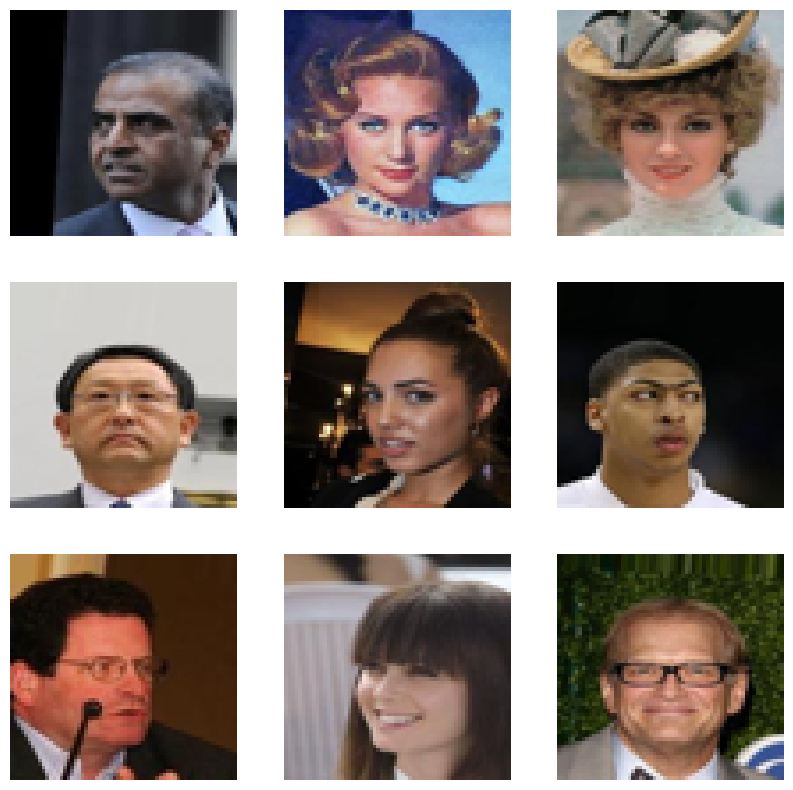

In [ ]:
# Wy≈õwietlanie przyk≈Çadowych obraz√≥w
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.show()

In [ ]:
#usniƒôcie poprzednich wynik√≥w w celach klarowno≈õci i u≈Çatwienia analizy
!rm /content/*epoch*

## 7. Budowa sieci

Generator:</br>
Generator przekszta≈Çca losowy wektor latentny
z o wymiarze z_dim =256 w obraz RGB o wymiarach 64√ó64√ó3. </br></br>

Architektura obejmuje:</br>
Warstwƒô gƒôstƒÖ (Dense), kt√≥ra przekszta≈Çca
z w tensor o wymiarach 8√ó8√ó256.</br>
Warstwy transponowanych splot√≥w (Conv2DTranspose), kt√≥re stopniowo zwiƒôkszajƒÖ rozdzielczo≈õƒá obrazu z 8√ó8 do 64√ó64. </br>
Funkcjƒô aktywacji LeakyReLU w celu zapobiegania zaniku gradient√≥w.</br>
Normalizacjƒô (BatchNormalization) dla stabilno≈õci treningu.</br>
OstatniƒÖ warstwƒô aktywacji tanh, kt√≥ra mapuje warto≈õci wyj≈õciowe do zakresu
[‚àí1,1].</br>

Dok≈Çadne rozpisanie warstw ich typu oraz liczby neuron√≥w:
1. Dense	Ukryta	16384
2. Conv2DTranspose	Ukryta	32768
3. Conv2DTranspose	Ukryta	65536
4. Conv2DTranspose	Ukryta	131072
5. Conv2DTranspose	Wyj≈õciowa	12288</br>




Dyskryminator:</br>
Dyskryminator to klasyfikator binarny, kt√≥ry ocenia, czy obraz jest wygenerowany (0) czy rzeczywisty (1). </br></br>

Architektura obejmuje:</br>
Warstwy konwolucyjne (Conv2D), kt√≥re zmniejszajƒÖ rozdzielczo≈õƒá obrazu z 64√ó64 do 8√ó8. </br>
Funkcjƒô aktywacji LeakyReLU dla stabilnej propagacji gradient√≥w.</br>
Dropout w celu zmniejszenia przeuczenia.</br>
OstatniƒÖ warstwƒô (Dense) z aktywacjƒÖ sigmoid, kt√≥ra przewiduje warto≈õƒá w zakresie [0,1].</br>

Dok≈Çadne rozpisanie warstw ich typu oraz liczby neuron√≥w:
1. Conv2D	Ukryta	65536
2. Conv2D	Ukryta	32768
3. Conv2D	Ukryta	16384
4. Flatten	Ukryta	16384
5. Dense	Wyj≈õciowa	1</br>



Uzasadnienie:</br>
W generatorze stopniowe zwiƒôkszanie rozdzielczo≈õci obrazu zapewnia tworzenie szczeg√≥≈Çowych obraz√≥w.</br>
Liczba filtr√≥w maleje, poniewa≈º szczeg√≥≈Çowe cechy obrazu sƒÖ dodawane na wy≈ºszych poziomach rozdzielczo≈õci.</br>
Funkcje aktywacji (LeakyReLU i tanh) wspierajƒÖ stabilny trening i generowanie danych.</br>

W dyskryminatorze stopniowe zmniejszanie rozdzielczo≈õci pozwala na wydobycie kluczowych cech obrazu.</br>
Liczba filtr√≥w ro≈õnie, aby na ni≈ºszych poziomach uchwyciƒá bardziej z≈Ço≈ºone wzorce.</br>
Funkcja aktywacji LeakyReLU stabilizuje propagacjƒô gradient√≥w.</br>
Funkcja aktywacji sigmoid w warstwie wyj≈õciowej dyskryminatora przekszta≈Çca wynik w przedzia≈Ç [0,1], co pozwala na interpretacjƒô jako prawdopodobie≈Ñstwo.



In [ ]:

# Generator

def build_generator(z_dim):
    model = Sequential()

    model.add(Dense(8 * 8 * 256, input_dim=z_dim))  # Dostosowano wymiary wyj≈õciowe
    model.add(Reshape((8, 8, 256)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128, kernel_size=5, strides=2, padding='same'))  # 16x16x128
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding='same'))  # 32x32x64
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(32, kernel_size=5, strides=2, padding='same'))  # 64x64x32
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.3))  # Dodano Dropout w generatorze

    model.add(Conv2DTranspose(3, kernel_size=5, strides=1, padding='same', activation='tanh'))  # 64x64x3
    return model

# Dyskryminator

def build_discriminator(img_shape):
    model = Sequential()
    model.add(Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))  # Przywr√≥cono mniejszy dropout

    model.add(Conv2D(128, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Conv2D(256, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model




In [ ]:
# Budowa GAN

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential([
        generator,
        discriminator
    ])
    return model

## 8. Konfiguracja sieci neuronowej

**Dyskryminator**</br>

Optymalizator: </br>
Adam z parametrami learningrate=0.0001 i Œ≤ 1=0.5.</br>
Adam jest jednym z najpopularniejszych optymalizator√≥w w GAN, poniewa≈º dobrze radzi sobie z niestabilno≈õciƒÖ gradient√≥w i dostosowuje tepo uczenia w przeciwie≈Ñstwie do standardowego SGD.</br>
Parametr ùõΩ1=0.5 pomaga w stabilizacji treningu, redukujƒÖc oscylacje wag.</br></br>
Funkcja kosztu:</br>
binary_crossentropy jest idealna dla klasyfikacji binarnej i oblicza r√≥≈ºnicƒô miƒôdzy przewidywanym prawdopodobie≈Ñstwem a rzeczywistƒÖ etykietƒÖ.</br></br>


**GAN**</br>
Zamro≈ºenie wag dyskryminatora: </br>
Wagi dyskryminatora sƒÖ zamra≈ºane podczas trenowania modelu GAN, aby nie by≈Çy aktualizowane, gdy uczymy generatora.</br></br>
Optymalizator: </br>
Adam z learningrate=0.0002 i Œ≤1=0.5.</br></br>

**Generator:**</br>
Nie jest kompilowany osobno, wagi generatora sƒÖ aktualizowane za po≈õrednictwem modelu GAN, kt√≥ry ≈ÇƒÖczy generator i dyskryminator oraz kompiluje je razem, definiujƒÖc funkcjƒô kosztu i optymalizator dla generatora.</br></br>

StƒÖd dla generatora mo≈ºemy wyr√≥zniƒá parametry:</br></br>
Optymalizator: </br>
Adam z parametrami learningrate=0.0002 i Œ≤1=0.5.</br>
Wy≈ºszy wsp√≥≈Çczynnik uczenia ni≈º w dyskryminatorze (
0.0002 vs. 0.0001) pomaga generatorowi lepiej nadƒÖ≈ºaƒá za dyskryminatorem.</br></br>
Funkcja kosztu: </br>binary_crossentropy.</br>
Generator pr√≥buje minimalizowaƒá stratƒô wynikajƒÖcƒÖ z b≈Çƒôdnej klasyfikacji wygenerowanego obrazu jako fa≈Çszywego przez dyskryminatora.





In [ ]:
img_shape = (64, 64, 3)  # Zmieniono rozmiar obraz√≥w na 64x64
z_dim = 512


In [ ]:
generator = build_generator(z_dim)
discriminator = build_discriminator(img_shape)
discriminator.compile(optimizer=tf.keras.optimizers.Adam(0.0001, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

gan = build_gan(generator, discriminator)
gan.compile(optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), loss='binary_crossentropy')

In [ ]:
# Zapis obraz√≥w

def save_generated_images(epoch, generator, z_dim=512):
    noise = np.random.uniform(-1, 1, (25, z_dim))  # Zmieniono na r√≥wnomierny rozk≈Çad szumu
    gen_images = generator.predict(noise)
    gen_images = 0.5 * (gen_images + 1)  # Przeskalowanie do [0, 1]

    fig, axs = plt.subplots(5, 5, figsize=(10, 10))
    cnt = 0
    for i in range(5):
        for j in range(5):
            axs[i, j].imshow(gen_images[cnt])
            axs[i, j].axis('off')
            cnt += 1
    plt.savefig(f"gan_images_epoch_{epoch}.png")
    plt.close()

In [ ]:
# Augmentacja danych - podjƒôlismy pr√≥by augmentacji danych, jednak wtedy wyniki byly znacznie gorsze

# def augment_images(images):
#     datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#         rotation_range=15,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         horizontal_flip=True
#     )
#     return datagen.flow(images, batch_size=64, shuffle=True)

## 9. Trenowanie sieci

Proces treningu:</br>

1. Normalizacja danych wej≈õciowych - Wszystkie obrazy wej≈õciowe zosta≈Çy przeskalowane, aby by≈Çy zgodne z aktywacjƒÖ tanh w generatorze.</br>
2. Podzia≈Ç batcha:dla ka≈ºdego batcha podzielili≈õmy obrazy na dwie czƒô≈õci:</br>
Po≈Çowa batcha: Obrazy rzeczywiste.</br>
Po≈Çowa batcha: Obrazy wygenerowane.</br>

3. Trening dyskryminatora:dyskryminator jest trenowany najpierw na obrazach rzeczywistych, a nastƒôpnie na obrazach wygenerowanych.</br>
4. Trening generatora:generator jest trenowany po≈õrednio przez model GAN, kt√≥ry aktualizuje jego wagi na podstawie strat wynikajƒÖcych z oszukiwania dyskryminatora.Funkcja kosztu zmusza generator do generowania obraz√≥w, kt√≥re dyskryminator uzna za rzeczywiste. </br>
5. Zapisywanie postƒôp√≥w: co okre≈õlonƒÖ liczbƒô epok (np. 50) zapisywane sƒÖ: wygenerowane obrazy,straty generatora i dyskryminatora. </br></br>

Parametry treningu:</br>

Liczba epok: 4800-5000.</br>
Rozmiar batcha: 64.</br>
Wymiar przestrzeni latentnej (
z_dim ): 512.</br>
Wybrane parametry zapewni≈Çy wystarczajƒÖcƒÖ liczbƒô iteracji, aby model nauczy≈Ç siƒô generowaƒá rozpoznawalne obrazy.
</br></br>

Poprawa skuteczno≈õci sieci:</br></br>
Pr√≥bowali≈õmy nastƒôpujƒÖcych rzeczy:</br>

- wprowadzenie augmentacji danych, </br>
- dzia≈Çania na r√≥≈ºnych datasetach,</br>
- zmiany w warstwach konwolucyjnych (w generatorze ustawienia 1024/512/256/128/64 oraz 512/256/128/64 - w obu przypadkach model bardzo szybko siƒô przetrenowywa≈Ç, tym samym generujƒÖc obrazy s≈Çabej jako≈õci, lub trening zajmowa≈Ç bardzo du≈ºo czasu bez wyra≈∫nych postp√≥w)</br>
- pr√≥ba trenowania dyskryminatora co x epok - nie wprowadza≈Ço znacznych zmian, a nawet czasem pogarsza≈Ço dzia≈Çanie moodelu. </br>
- pr√≥ba modyfikacji optimizera i learning rate np. generator 0,0002 i dyskryminator 0,00008 oraz inne modyfikacje - aktualne ustawienie dawa≈Ço najlepsze wyniki, </br>
- modyfikacje wymiaru przestrzeni latentnej z_dim: 128,200,256 i 512, wyniki dla 256 i 512 by≈Çy zbli≈ºone, ale minimalnie lepsze dla 512, stƒÖd decyzja o pozostaniu przy tej warto≈õci, </br>
- zmiany w batch size: podejmowali≈õmy pr√≥by przy batch size 32, 64 i 128, przy batch size 64 wyniki modleu i jako≈õƒá obrazu by≈Çy zadowalajƒÖce. </br>

PatrzƒÖc na ograniczony czas oraz zasoby obliczeniowe, aktualne parametry modelu dajƒÖ zadowalajƒÖce wyniki, stƒÖd decyzja o ich pozostawieniu.




  


In [ ]:
# Trening GAN
def train_gan(generator, discriminator, gan, train_images, epochs=4700, batch_size=64, z_dim=512):
    train_images = (train_images - 0.5) * 2  # Normalizacja do [-1, 1]
    half_batch = batch_size // 2

    metrics = {
        "epoch": [],
        "d_loss": [],
        "d_acc": [],
        "g_loss": []
    }

    for epoch in range(epochs):
        # Trening dyskryminatora
        idx = np.random.randint(0, train_images.shape[0], half_batch)
        real_images = train_images[idx]

        noise = np.random.uniform(-1, 1, (half_batch, z_dim))  # Zmieniono na r√≥wnomierny rozk≈Çad szumu
        fake_images = generator.predict(noise)

        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))

        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Trening generatora
        noise = np.random.uniform(-1, 1, (batch_size, z_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Zbieranie metryk
        metrics["epoch"].append(epoch)
        metrics["d_loss"].append(d_loss[0])
        metrics["d_acc"].append(100 * d_loss[1])
        metrics["g_loss"].append(g_loss)

        # Wy≈õwietlanie postƒôp√≥w
        if epoch % 50 == 0:
            print(f"Epoch {epoch} [D loss: {d_loss[0]:.4f}, acc.: {100 * d_loss[1]:.2f}%] [G loss: {g_loss:.4f}")
            save_generated_images(epoch, generator, z_dim)

    return metrics


In [ ]:
# # Wczytywanie danych CIFAR-10 - poczƒÖtkowo pr√≥bowali≈õmy te≈º trenowac model na dataset CIFAR-10(caly zbior i wybrane kategorie) jednak znaczƒÖca r√≥≈ºnorodnosc obraz√≥w i ich ilo≈õc nie dawa≈Çy zadowalajƒÖcych wynik√≥w
# (train_images, train_labels), (_, _) = cifar10.load_data()

# # Filtrowanie dla ps√≥w (5) i kot√≥w (3)
# categories_to_use = [3, 5]  # Koty i psy
# filtered_indices = np.isin(train_labels, categories_to_use)
# train_images_filtered = train_images[filtered_indices.flatten()]
# train_labels_filtered = train_labels[filtered_indices.flatten()]

# train_images_filtered = train_images_filtered / 255.0  # Normalizacja do [0, 1]
# print(f"Za≈Çadowano {train_images_filtered.shape[0]} obraz√≥w z kategorii koty i psy o wymiarach {train_images_filtered.shape[1:]}.")


Za≈Çadowano 10000 obraz√≥w z kategorii koty i psy o wymiarach (32, 32, 3).


In [ ]:
# Trenowanie - do punku 11 co 50 epok wy≈õwietlane sƒÖ metryki D_loss, G_loss, D_accuracy
metrics = train_gan(generator, discriminator, gan, train_images, epochs=4800, batch_size=64, z_dim=z_dim)

1/1 [==============================] - 0s 65ms/step
Epoch 0 [D loss: 0.6094, acc.: 62.50%] [G loss: 1.0623
1/1 [==============================] - 0s 71ms/step
Epoch 50 [D loss: 0.6873, acc.: 53.12%] [G loss: 0.7579
1/1 [==============================] - 0s 71ms/step
Epoch 100 [D loss: 0.6812, acc.: 60.94%] [G loss: 0.9316
1/1 [==============================] - 0s 69ms/step
Epoch 150 [D loss: 0.5999, acc.: 75.00%] [G loss: 0.9855
1/1 [==============================] - 0s 68ms/step
Epoch 200 [D loss: 0.4894, acc.: 81.25%] [G loss: 0.8066
1/1 [==============================] - 0s 66ms/step
Epoch 250 [D loss: 0.6253, acc.: 64.06%] [G loss: 0.9587
1/1 [==============================] - 0s 55ms/step
Epoch 300 [D loss: 0.4567, acc.: 84.38%] [G loss: 1.3073
1/1 [==============================] - 0s 62ms/step
Epoch 350 [D loss: 0.6882, acc.: 50.00%] [G loss: 0.7372
1/1 [==============================] - 0s 73ms/step
Epoch 400 [D loss: 0.5969, acc.: 68.75%] [G loss: 1.1104
1/1 [=================

## 10. Ilustracja dzia≈Çania sieci

Funkcja generate_images generuje obrazy na podstawie losowych wektor√≥w latentnych o wymiarze 512, kt√≥re sƒÖ przekszta≈Çcane przez wytrenowany generator.</br> Wygenerowane obrazy sƒÖ skalowane do zakresu [0,1] i wy≈õwietlane w siatce 5x5 dla wizualnej oceny wynik√≥w.

In [ ]:
# Generowanie nowych obraz√≥w
def generate_images(generator, z_dim=512, num_images=25):
    """
    Generuje nowe obrazy na podstawie losowych wektor√≥w latentnych.

    Args:
    - generator: wytrenowany model generatora.
    - z_dim: wymiar przestrzeni latentnej.
    - num_images: liczba obraz√≥w do wygenerowania.
    """
    # Generowanie losowych wektor√≥w latentnych
    noise = np.random.uniform(-1, 1, (num_images, z_dim))

    # Generowanie obraz√≥w
    generated_images = generator.predict(noise)

    # Przeskalowanie obraz√≥w do zakresu [0, 1] (z [-1, 1])
    generated_images = 0.5 * (generated_images + 1)

    # Wy≈õwietlanie obraz√≥w
    fig, axs = plt.subplots(5, 5, figsize=(10, 10))
    cnt = 0
    for i in range(5):
        for j in range(5):
            axs[i, j].imshow(generated_images[cnt])
            axs[i, j].axis('off')
            cnt += 1
    plt.show()


1/1 [==============================] - 0s 51ms/step


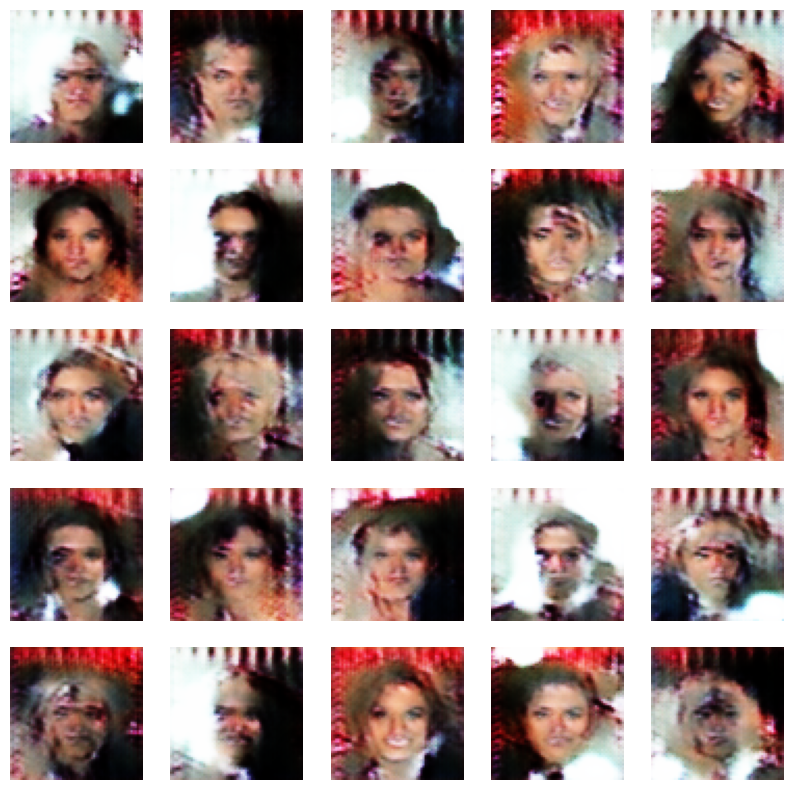

In [ ]:
generate_images(generator, z_dim=512, num_images=25)

## 11. Ewaluacja


Po treningu na zestawie danych CelebA, sieƒá GAN nauczy≈Ça siƒô generowaƒá rozpoznawalne obrazy twarzy.</br>
W poczƒÖtkowych etapach treningu obrazy by≈Çy s≈Çabej jako≈õci, z widocznymi artefaktami. Jednak wraz z postƒôpem treningu ich jako≈õƒá znacznie siƒô poprawi≈Ça.</br>
Najlepsze wyniki uzyskano w okolicach epoki 4800, co wskazuje, ≈ºe d≈Çu≈ºszy trening (do 4700 epok) by≈Ç korzystny dla jako≈õci modelu.</br>
Wyniki metryk takich jak D loss G loss i D accuracy pokazane sƒÖ w outpucie kom√≥rki trenowania modelu.</br>
Pomimo ≈ºe wyniki te nie zawsze by≈Çy idealne - D accuracy osiƒÖga≈Ça od 60 do 70%, to czasem przy takich wynikach jako≈õƒá obrazu by≈Ça znacznie lepsza ni≈º przy wynikach takich jak D accuracy 50%.

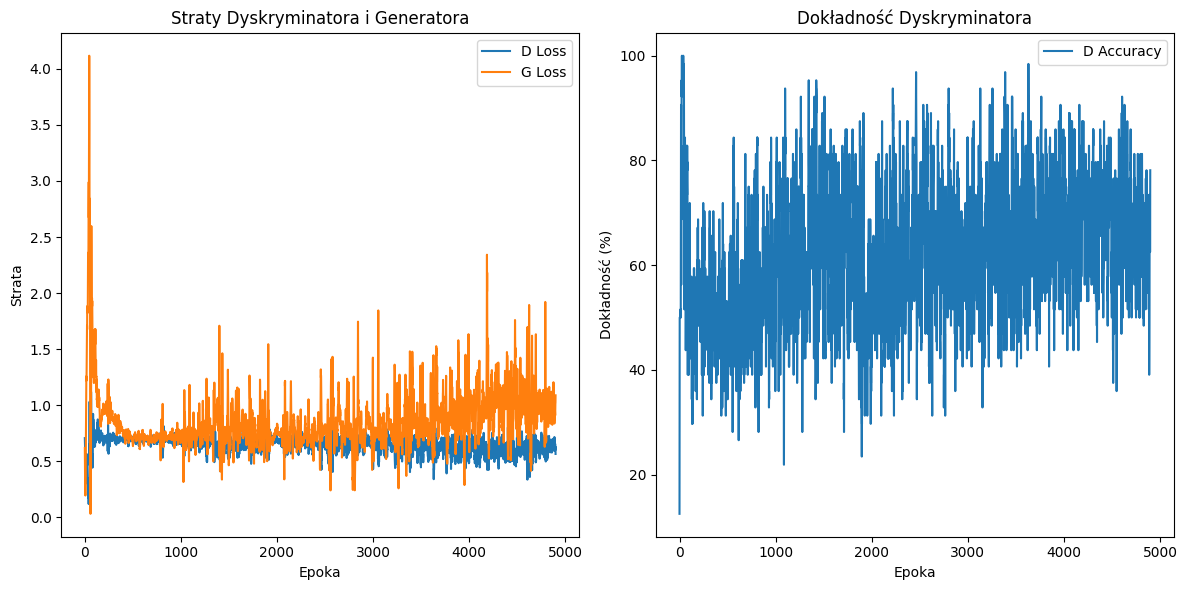

In [ ]:
# Generowanie raportu z metrykami
def plot_metrics(metrics):
    """
    Funkcja wizualizujƒÖca metryki modelu na przestrzeni epok.
    """
    epochs = metrics["epoch"]
    plt.figure(figsize=(12, 6))

    # Wykres strat dyskryminatora i generatora
    plt.subplot(1, 2, 1)
    plt.plot(epochs, metrics["d_loss"], label="D Loss")
    plt.plot(epochs, metrics["g_loss"], label="G Loss")
    plt.title("Straty Dyskryminatora i Generatora")
    plt.xlabel("Epoka")
    plt.ylabel("Strata")
    plt.legend()

    # Wykres dok≈Çadno≈õci dyskryminatora
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics["d_acc"], label="D Accuracy")
    plt.title("Dok≈Çadno≈õƒá Dyskryminatora")
    plt.xlabel("Epoka")
    plt.ylabel("Dok≈Çadno≈õƒá (%)")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(metrics)

##12.  Interpretacja merytoryczna opracowanej sieci neuronowej, w szczeg√≥lno≈õci jako≈õci jej dzia≈Çania

Model GAN skutecznie nauczy≈Ç siƒô generowaƒá obrazy twarzy, co potwierdzajƒÖ wygenerowane pr√≥bki.</br>
Dok≈Çadno≈õƒá dyskryminatora waha≈Ça siƒô miƒôdzy 50% a 70%, co wskazuje, ≈ºe model dzia≈Ça w stabilnym zakresie r√≥wnowagi miƒôdzy generatorem a dyskryminatorem. Wy≈ºsze warto≈õci, takie jak 70%, mogƒÖ wskazywaƒá, ≈ºe dyskryminator jest nieco silniejszy, ale wciƒÖ≈º pozwala generatorowi poprawiaƒá swoje wyniki.</br>
Wyniki obraz√≥w sƒÖ zgodne z oczekiwaniami projektu i potwierdzajƒÖ skuteczno≈õƒá zastosowanej architektury oraz parametr√≥w treningowych.</br>
Metryki takie jak straty dyskryminatora i generatora stabilizowa≈Çy siƒô w p√≥≈∫niejszych epokach, co potwierdza osiƒÖgniƒôcie r√≥wnowagi w procesie uczenia.</br>
Oczywi≈õcie poprawa modelu jest jeszcze mo≈ºliwa np. testujƒÖc r√≥≈ºne modyfikacje w warstwach generatora i dyskryminatora oraz modyfikujƒÖc parametry, ale na potrzeby projektu, majƒÖc na uwadze ograniczone zasoby wyniki dzia≈Çania sieci, sƒÖ one bardzo zadowalajƒÖce.
